import numpy as np
import matplotlib.pyplot as plt

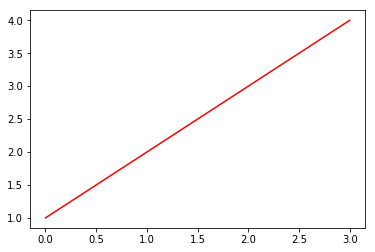

In [4]:
x = np.linspace(0,3,4)  # xの値域(0, 1, 2, 3)
y = x + 1               # 直線の式
plt.plot(x,y,"r-")      # 直線を引く
plt.show()   

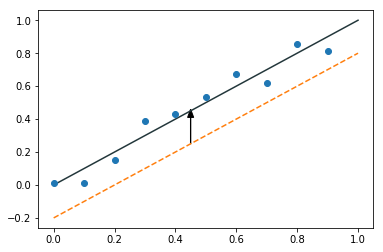

In [67]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,1)  # xの値域(0, 1, 2, 3)
y = x               # 直線の式
plt.plot(x,y,"#23373b")      # 直線を引く
z = (np.random.rand(1,10)[0] - 0.5) * 0.2
plt.plot(np.arange(0,1,0.1), z+np.arange(0,1,0.1), 'o')
w = x - 0.2
plt.plot(x, w, "--")
ax = plt.axes()
ax.arrow(0.45, 0.25, 0, 0.16, head_width=0.02, head_length=0.05, fc='k', ec='k')
plt.savefig('arrange_params.eps')
plt.show()   


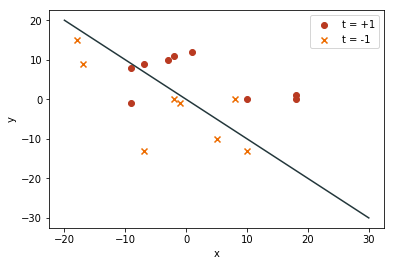

In [104]:
plt.scatter([-9, -9,-7,-3,-2, 1,10,18,18],[-1,8,9, 10, 11, 12,0,1,0], marker='o', label='t = +1', c='#B93A21')
plt.scatter([-18, -17,-7,-2,-1, 8,10,5],[15,9,-13, 0, -1, 0,-13,-10], marker='x', label='t = -1', c='#ED6C00')
x = np.linspace(-20,30,10)
# F9E72C
# 6DB9AA
y = -x

plt.plot(x,y, '#23373b')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig('scatter.eps')
plt.show()

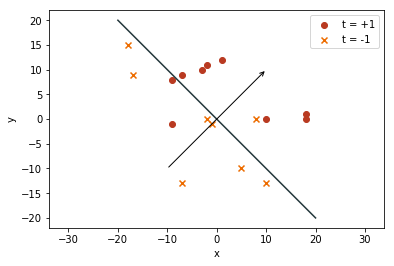

In [125]:
plt.scatter([-9, -9,-7,-3,-2, 1,10,18,18],[-1,8,9, 10, 11, 12,0,1,0], marker='o', label='t = +1', c='#B93A21')
plt.scatter([-18, -17,-7,-2,-1, 8,10,5],[15,9,-13, 0, -1, 0,-13,-10], marker='x', label='t = -1', c='#ED6C00')
x = np.linspace(-20,20,10)
# F9E72C
# 6DB9AA
y = -x


plt.plot(x,y, '#23373b')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis('equal')
ax = plt.subplot(1,1,1)

ax.annotate("",
            xy=(10, 10), xycoords='data',
            xytext=(-10, -10), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), 
            )

plt.savefig('direction.eps')
plt.show()

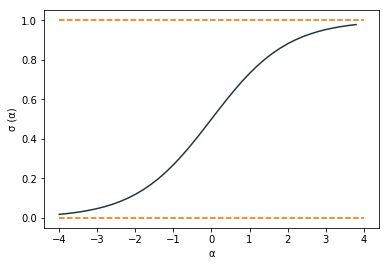

In [139]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

import matplotlib.pyplot as plt
import numpy as np
plt.hlines(y=[1,0.], xmin=-4, xmax=4, colors='#ED6C00', linestyles='dashed')
x = np.arange(-4, 4., 0.2)
sig = sigmoid(x)
plt.xlabel("α")
plt.ylabel('σ (α)')
plt.plot(x,sig, c = '#23373b')
plt.savefig('sigmoid.eps')
plt.show()


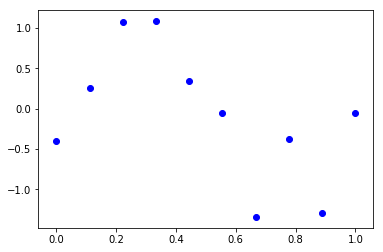

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

# データセット {x_n,y_n} (n=1...num) を用意
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x,y], index=['x','y']),
                                 ignore_index=True)
    return dataset

N=10           # サンプルを取得する位置 x の個数
train_set = create_dataset(N)
train_set
plt.scatter(train_set.x, train_set.y, marker='o', color='blue')
plt.show()

In [158]:

# 最小二乗法で解を求める
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return f

In [165]:

# 平方根平均二乗誤差（Root mean square error）を計算
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

In [168]:
def show_result(subplot, train_set, m):
    f = resolve(train_set, m)
    subplot.set_xlim(-0.05,1.05)
    subplot.set_ylim(-1.5,1.5)
    subplot.set_title("M=%d" % m, fontsize=10)

    # トレーニングセットを表示
    subplot.scatter(train_set.x, train_set.y, marker='o',
                    color='blue', label=None)

    # 真の曲線を表示
    linex = np.linspace(0,1,101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')

    # 多項式近似の曲線を表示
    linex = np.linspace(0,1,101)
    liney = f(linex)
    label = "E(RMS)=%.2f" % rms_error(train_set, f)
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1, fontsize=10)

In [170]:

fig = plt.figure(figsize=(7, 5))
for i, m in enumerate([3]):
    subplot = fig.add_subplot(2,2,i+1)
    show_result(subplot, train_set,m)

asd


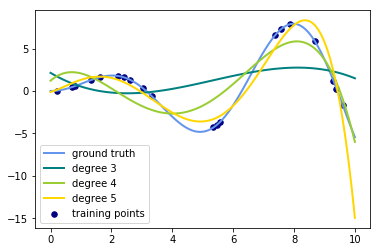

In [174]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]
plt.show()
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')
plt.savefig('polyreg.eps')
plt.show()